<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Demo-running-eazy-py" data-toc-modified-id="Demo-running-eazy-py-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demo running eazy-py</a></span><ul class="toc-item"><li><span><a href="#Setup-things" data-toc-modified-id="Setup-things-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup things</a></span></li><li><span><a href="#HDFN-catalog" data-toc-modified-id="HDFN-catalog-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>HDFN catalog</a></span></li><li><span><a href="#ZFOURGE-catalog" data-toc-modified-id="ZFOURGE-catalog-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ZFOURGE catalog</a></span></li><li><span><a href="#Initialize-eazy.photoz.PhotoZ-object" data-toc-modified-id="Initialize-eazy.photoz.PhotoZ-object-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Initialize <code>eazy.photoz.PhotoZ</code> object</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Iterative-zeropoint-corrections" data-toc-modified-id="Iterative-zeropoint-corrections-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Iterative zeropoint corrections</a></span></li><li><span><a href="#Now-fit-the-whole-catalog" data-toc-modified-id="Now-fit-the-whole-catalog-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Now fit the whole catalog</a></span></li></ul></li></ul></li><li><span><a href="#zout-properties" data-toc-modified-id="zout-properties-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><code>zout</code> properties</a></span></li></ul></li><li><span><a href="#Save-/-restore-state-with-HDF5" data-toc-modified-id="Save-/-restore-state-with-HDF5-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Save / restore state with HDF5</a></span><ul class="toc-item"><li><span><a href="#Initialize-from-HDF5" data-toc-modified-id="Initialize-from-HDF5-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initialize from HDF5</a></span></li><li><span><a href="#Tool-for-visualizing-SEDs-straight-from-HDF5" data-toc-modified-id="Tool-for-visualizing-SEDs-straight-from-HDF5-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tool for visualizing SEDs straight from HDF5</a></span></li></ul></li><li><span><a href="#Visualization-tool" data-toc-modified-id="Visualization-tool-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualization tool</a></span><ul class="toc-item"><li><span><a href="#static-view" data-toc-modified-id="static-view-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>static view</a></span></li></ul></li></ul></div>

# Demo running eazy-py

In [1]:
%matplotlib inline

## Setup things 

For running on cloud environments, e.g, 

<p style="float:left; margin:5px"> <a href="https://colab.research.google.com/github/gbrammer/eazy-py/blob/master/docs/examples/HDFN-demo.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="float:left"/> </a> </p>

<p style="display:inline-block; margin:5px"> <a href="https://mybinder.org/v2/gh/gbrammer/eazy-py/HEAD?filepath=docs%2Fexamples%2FHDFN-demo.ipynb"><img src="https://mybinder.org/badge_logo.svg" /> </a> </p>


In [1]:
import os
import sys

In [2]:
# environment installation for hosted notebooks
# (e.g., mybinder, GoogleCollab)
import os
import sys

orig_wd = os.getcwd()

try:
    import eazy
    HAS_EAZY = True
except:
    HAS_EAZY = False

# mybinder
if ('jovyan' in orig_wd):
    if not HAS_EAZY:
        print('Install on /home/jovyan')

        os.chdir('/home/jovyan')
        ! {sys.executable} -m pip install . -r requirements.txt

        os.chdir(orig_wd)
    
    try:
        import grizli
    except:
        ! {sys.executable} -m pip install cython
        ! {sys.executable} -m pip install git+https://github.com/gbrammer/grizli
            
    try:
        print('EAZYCODE = '+os.getenv('EAZYCODE'))
    except:
        %env EAZYCODE=/home/jovyan/eazy-photoz/

# Google collab
if ('/content' in orig_wd):
    if not HAS_EAZY:
        print('Install on /content (Google Collab')

        os.chdir('/content')
        !git clone https://github.com/gbrammer/eazy-py.git --recurse-submodule
        os.chdir('/content/eazy-py')
        ! {sys.executable} -m pip install . -r requirements.txt

        os.chdir(orig_wd)
    
    try:
        import grizli
    except:
        ! {sys.executable} -m pip install cython
        ! {sys.executable} -m pip install git+https://github.com/gbrammer/grizli
            
    try:
        print('EAZYCODE = '+os.getenv('EAZYCODE'))
    except:
        %env EAZYCODE=/content/eazy-py/eazy-photoz/

try:
    import astroquery
except:
    ! {sys.executable} -m pip install astroquery

try:
    import lxml
except ImportError:
    ! pip install lxml

In [3]:
# Module versions
import importlib
import sys
import time
print(time.ctime() + '\n')

print(sys.version + '\n')

for module in ['numpy', 'scipy', 'matplotlib','astropy','eazy', 'prospect']:
    #print(module)
    mod = importlib.import_module(module)
    print('{0:>20} : {1}'.format(module, mod.__version__))


Wed Oct  4 12:30:51 2023

3.9.6 (default, Aug 11 2023, 19:44:49) 
[Clang 15.0.0 (clang-1500.0.40.1)]

               numpy : 1.23.4
               scipy : 1.9.3
          matplotlib : 3.7.1
             astropy : 5.1.1
                eazy : 0.5.2.dev68
            prospect : 1.1.0


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy

# Symlink templates & filters from the eazy-code repository
try:
    print('EAZYCODE = '+os.getenv('EAZYCODE'))
except:
    pass

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs() 

In [5]:
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [6]:
pwd

'/Users/ptanouri/Desktop/eazy-py/docs/examples'

## HDFN catalog

Default parameters are stored in the file `eazy/data/zphot.param.default` in the repository.

Parameter that differ from defaults can be provided in a dictionary as follows.

In [7]:
params = {}
params['CATALOG_FILE'] = os.path.join(str(os.getenv('EAZYCODE')), '/inputs/hdfn_fs99_eazy.cat')

params['MAIN_OUTPUT_FILE'] = 'hdfn.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 6.

params['PRIOR_ABZP'] = 25 
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['FIX_ZSPEC'] = False

params['IGM_SCALE_TAU'] = 1.0

translate_file = os.path.join(str(os.getenv('EAZYCODE')), 'inputs/zphot.translate')


In [8]:
translate_file

'None/inputs/zphot.translate'

## ZFOURGE catalog

Use the [ZFOURGE](https://sites.google.com/site/zfourge/) CDFS catalog from Straatman et al., pulled from [Vizier](https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs).

In [9]:
import pandas as pd
from grizli.catalog import query_tap_catalog

# field = 'cdfs'
field = 'uds'

# radec = {'cdfs':(53.0, -27.9), 
#          'uds':(34.3, -5.3)}

# # Vizier Table
# # https://vizier.cfa.harvard.edu/viz-bin/VizieR-3?-source=J/ApJ/830/51/zf_cdfs
# db = f'"J/ApJ/830/51/zf_{field}"'

# Bright mag to limit catalog size
MAX_KMAG = 22.5

# # # Get table from Vizier
# zf = query_tap_catalog(*radec[field], radius=60, db=db, vizier=True, 
#                        extra=f" AND (zspec > 0 OR FKsall > {10**(-0.4*(MAX_KMAG-25))})", verbose=True)

# print(f'\nFound {len(zf)} objects in {db}')

# cat_name = f'zfourge.{field}.zspec.vizier.csv'
cat_name = f'zfourge.{field}.zspec.vizier.csv'
# zf.write(cat_name, overwrite=True)

print(cat_name)

zfourge.uds.zspec.vizier.csv


In [10]:
#### Update parameters

# Predefined translate file
trans_name = f'zfourge.{field}.vizier.translate.csv'
# csv_trans = pd.read_csv(f'https://erda.ku.dk/vgrid/Gabriel%20Brammer/Catalogs/{trans_name}')
# csv_trans.to_csv(trans_name, index=False)

# New parameters
# params['MW_EBV'] = eazy.utils.get_irsa_dust(np.nanmedian(zf['ra']), np.nanmedian(zf['dec']))

params['CATALOG_FILE'] = cat_name
params['PRIOR_ABZP'] = 25
params['CATALOG_FORMAT'] = 'csv'
params['PRIOR_FILTER'] = 255
#params['TEMPLATES_FILE'] = 'templates/spline_templates_v2/tweak_spline.param'
params['MAIN_OUTPUT_FILE'] = f'zfourge.{field}'

params['SYS_ERR'] = 0.03

params['Z_MAX'] = 12.
params['Z_STEP'] = 0.005

translate_file = trans_name

In [32]:
cat_name

'zfourge.uds.zspec.vizier.csv'

In [33]:
trans_name

'zfourge.uds.vizier.translate.csv'

## Initialize `eazy.photoz.PhotoZ` object

In [11]:
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/ptanouri/Library/Python/3.9/lib/python/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: zfourge.uds.zspec.vizier.csv
   >>> NOBJ = 3208
F8_0 e_F8_0 ( 21): IRAC/irac_tr4_2004-08-09.dat
F5_8 e_F5_8 ( 20): IRAC/irac_tr3_2004-08-09.dat
F4_5 e_F4_5 ( 19): IRAC/irac_tr2_2004-08-09.dat
F3_6 e_F3_6 ( 18): IRAC/irac_tr1_2004-08-09.dat
FKs e_FKs (255): FOURSTAR/Ks_cam_optics_sky.txt
FKsHI e_FKsHI (269): VLT/hawki_k_ETC.dat
FJ1 e_FJ1 (249): FOURSTAR/J1_cam_optics_sky.txt
FJ2 e_FJ2 (250): FOURSTAR/J2_cam_optics_sky.txt
FJ3 e_FJ3 (251): FOURSTAR/J3_cam_optics_sky.txt
FHs e_FHs (254): FOURSTAR/Hshort_cam_optics_sky.txt
FHl e_FHl (253): FOURSTAR/Hlong_cam_optics_sky.txt
Fu e_Fu ( 88): megaprime/cfht_mega_u_cfh9301.dat
FB e_FB (122): UKIDSS/B_qe.txt
FV e_FV ( 79): COSMOS/SUBARU_filter_V.txt
FR e_FR (123): UKIDSS/R_qe.txt
Fi e_Fi (124): UKIDSS/i_qe.txt
Fz e_Fz (125): UKIDSS/z_qe.txt
FY e_FY (266): VLT/hawki_y_ETC.dat
FJ e_FJ (263): UKIDSS/Table04_online.dat

100%|███████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:23<00:00,  1.95s/it]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 23.945 s


511it [00:00, 996.67it/s] 


#### Iterative zeropoint corrections

Iteration:  0


100%|█████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:39<00:00, 12.81it/s]


Compute best fits
fit_best: 0.5 s (n_proc=1,  NOBJ=3112)
Fit 41.0 s (n_proc=8, NOBJ=3204)
Iterative correction - zeropoint / template
Iteration:  1


100%|█████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:37<00:00, 13.76it/s]


Compute best fits
fit_best: 0.5 s (n_proc=1,  NOBJ=3114)
Fit 38.2 s (n_proc=8, NOBJ=3204)
Iterative correction - zeropoint / template
Iteration:  2


 28%|███████████████████████▉                                                             | 144/511 [00:14<00:27, 13.42it/s]


 NNLS quitting on iteration count.

 NNLS quitting on iteration count.


100%|█████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:37<00:00, 13.47it/s]


Compute best fits
fit_best: 0.5 s (n_proc=1,  NOBJ=3115)
Fit 39.3 s (n_proc=8, NOBJ=3204)
Iterative correction - zeropoint / template


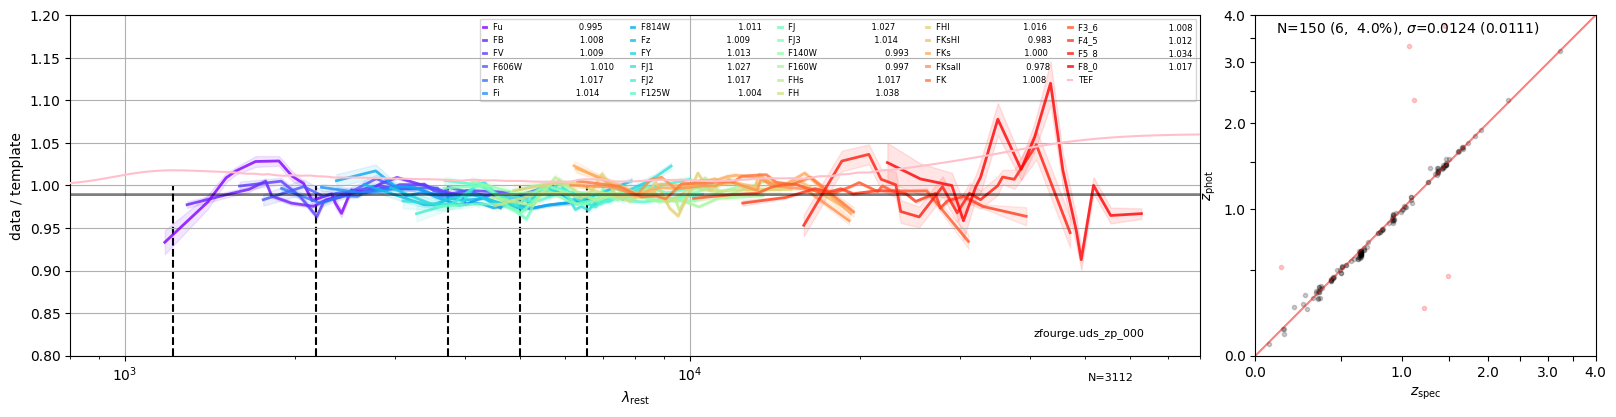

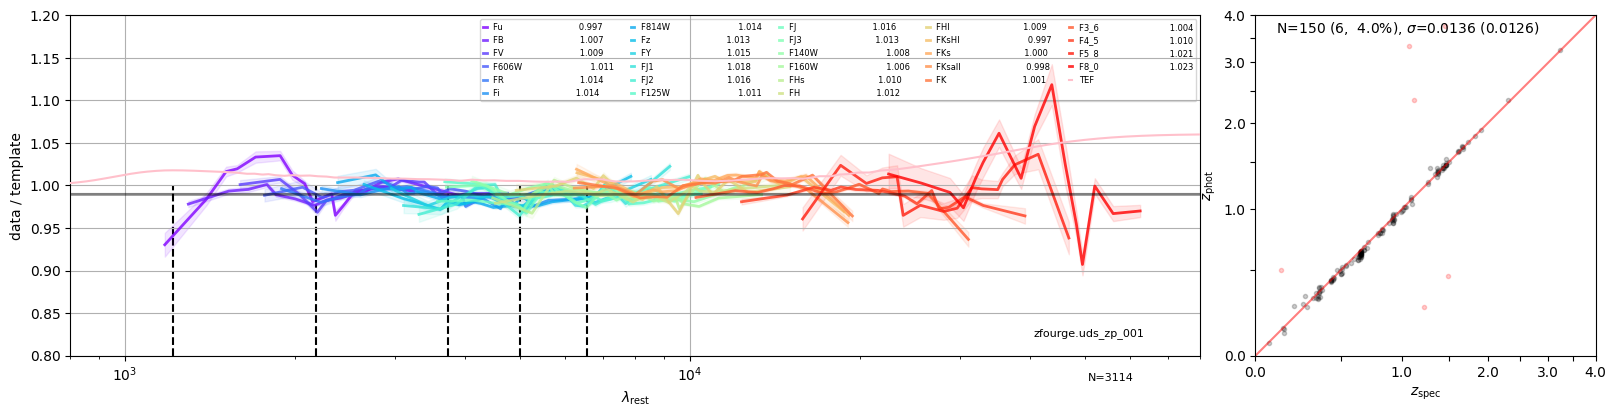

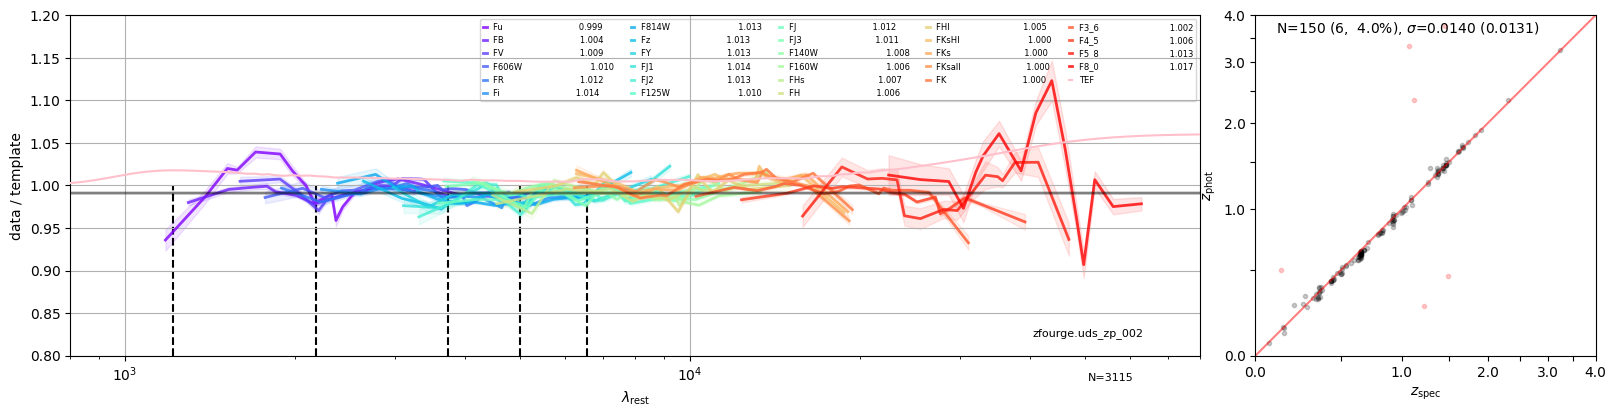

In [12]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

#### Now fit the whole catalog

In [13]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

Set sys_err = 0.03 (positive=True)


100%|█████████████████████████████████████████████████████████████████████████████████████| 511/511 [00:39<00:00, 12.89it/s]


Compute best fits
fit_best: 0.5 s (n_proc=1,  NOBJ=3114)
Fit 41.0 s (n_proc=8, NOBJ=3208)


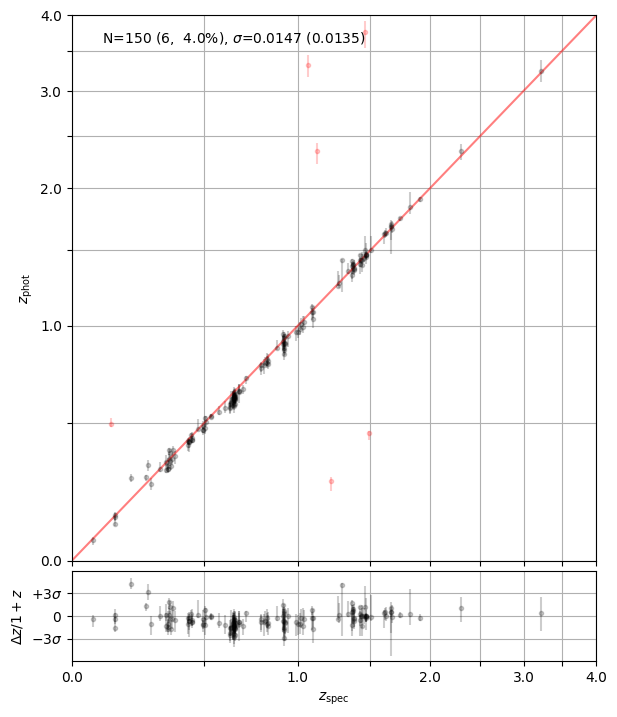

In [27]:
# Show zspec-zphot comparison

fig = self.zphot_zspec()




In [16]:
pos_index = []
for i in range(len(zspec)):
    if (zspec[i]!= 0):
        pos_index.append(i)

len(pos_index)

NameError: name 'zspec' is not defined

In [129]:
# self.get_grizli_photometry()


x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

zout

<GTable length=3208>
  id      ra     ...         ssfr_p        
                 ...         1 / yr        
int64  float64   ...       float64[5]      
----- ---------- ... ----------------------
   20  34.355011 ...   4.85e-13 .. 5.50e-13
   13 34.3652534 ...   5.87e-10 .. 1.29e-09
   15    34.3708 ...   4.07e-13 .. 4.94e-13
    7 34.3740616 ...   6.26e-13 .. 1.85e-11
   19 34.3684464 ...   3.22e-10 .. 2.24e-09
   41 34.3696938 ...   4.72e-10 .. 1.70e-09
  ...        ... ...                    ...
19969  34.211586 ...   4.70e-10 .. 8.18e-10
20115 34.2010384 ...   1.16e-09 .. 1.47e-09
19317 34.1989632 ...   4.60e-10 .. 1.58e-09
19642 34.2005119 ...   3.91e-12 .. 2.00e-10
20114 34.1976204 ...   3.28e-10 .. 9.69e-10
   --         -- ... -9.00e+29 .. -9.00e+29

In [ ]:
zphot_max[19]-zphot[19]


In [42]:
zspec=np.array(zout['z_spec'])[pos_index]
zphot=np.array(zout['z_phot'])[pos_index]
zphot_min = np.array(zout['z025'])[pos_index]
zphot_max = np.array(zout['z975'])[pos_index]

plt.figure(figsize=(5, 4))


# plt.scatter(zspec,zphot, color = '#848484')
plt.plot(x,y, color = '#FA8072')

plt.errorbar(zspec, zphot, [zphot-zphot_min,zphot_max-zphot], marker = '.',linestyle='none', color = '#848484')
# plt.loglog()
plt.xlim(0,4)
plt.ylim(0,4)


plt.xlabel('Spec-z', fontsize = 11)
plt.ylabel('Photo-z', fontsize = 11)
plt.text(0.2, 3.5, 'N = 150', fontsize=11)

plt.show()

NameError: name 'zout' is not defined

In [ ]:
SE

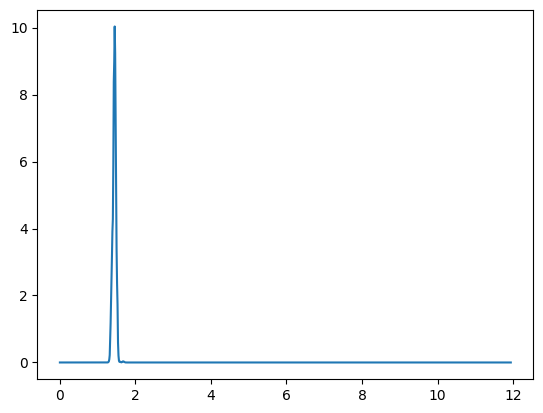

In [512]:
ind = 4

self.full_logprior[ind,:]
plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

best_z_val=common_grid[np.where(np.exp(self.lnp[ind,:])==max(np.exp(self.lnp[ind,:])))[0][0]]

In [513]:
print(best_z_val)

1.79404811111151


In [93]:
ind = 78
# self.lnp_with_prior

# plt.plot(self.zgrid,np.exp(self.lnp_beta[ind,:]))


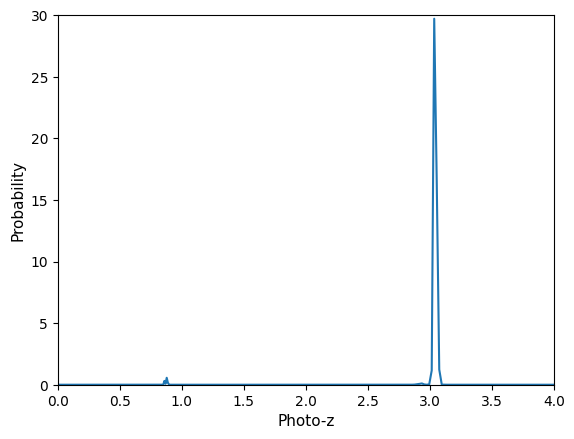

In [363]:
ind = 46

plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

plt.ylim(0,30)
plt.xlim(0,4)

plt.xlabel('Photo-z', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.show()

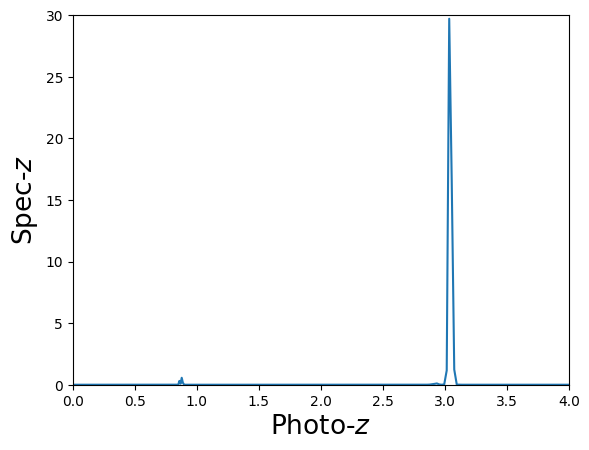

In [33]:
ind = 46

plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

plt.ylim(0,30)
plt.xlim(0,4)

plt.xlabel(r'$\mathrm{Photo}$-$\mathit{z}$', fontsize=19)
plt.ylabel(r'$\mathrm{Spec}$-$\mathit{z}$', fontsize=19)
# plt.ylabel('Probability', fontsize = 11)
plt.show()

In [34]:
#29,46
np.max(self.zgrid)

11.935175

In [421]:
plt.plot(self.zgrid,np.exp(self.lnp[0,:]))

# np.exp(self.lnp[3207,:])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [161]:
import numpy as np
np.exp(self.lnp[3207,:])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [359]:
self.cat[''][46]

932

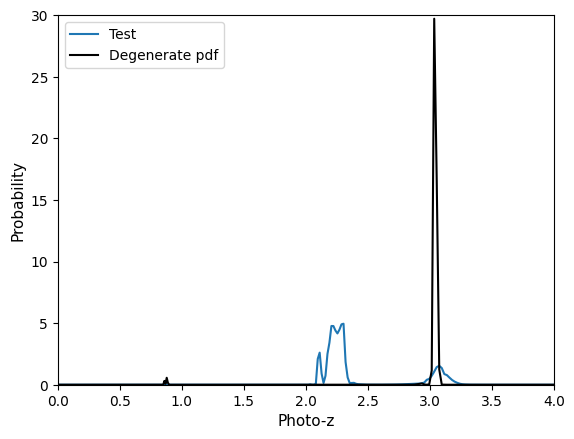

In [378]:
ind =3207



np.array(zout['z_spec'])[ind]
plt.plot(self.zgrid,np.exp(self.lnp[ind,:]), label = 'Test')

plt.plot(self.zgrid,np.exp(self.lnp[46,:]), label = 'Degenerate pdf', color = 'black')

plt.ylim(0,30)
plt.xlim(0,4)

plt.xlabel('Photo-z', fontsize = 11)
plt.ylabel('Probability', fontsize = 11)
plt.legend()
plt.show()

In [254]:
self.lnp[ind,:]

array([-2.39303040e+02, -2.38418823e+02, -2.37553101e+02, -2.36541931e+02,
       -2.35266373e+02, -2.33816803e+02, -2.32671906e+02, -2.32491562e+02,
       -2.31469757e+02, -2.29704819e+02, -2.28285873e+02, -2.27069717e+02,
       -2.26327957e+02, -2.25168701e+02, -2.23835388e+02, -2.22793152e+02,
       -2.22014542e+02, -2.21273392e+02, -2.20239197e+02, -2.19057236e+02,
       -2.17814728e+02, -2.16480392e+02, -2.15214203e+02, -2.14155640e+02,
       -2.13317337e+02, -2.12723907e+02, -2.12260040e+02, -2.11923615e+02,
       -2.11857544e+02, -2.12072433e+02, -2.12809601e+02, -2.14964554e+02,
       -2.19922913e+02, -2.27187561e+02, -2.33446777e+02, -2.35579056e+02,
       -2.33586090e+02, -2.29888077e+02, -2.27342621e+02, -2.27234436e+02,
       -2.28103973e+02, -2.28582748e+02, -2.28106842e+02, -2.26266266e+02,
       -2.23590393e+02, -2.20589050e+02, -2.18077835e+02, -2.16369766e+02,
       -2.14727386e+02, -2.13663818e+02, -2.12452316e+02, -2.11876251e+02,
       -2.10419281e+02, -

# Code to Combine my FIR p(z) with EAZY p(z)

In [366]:
# p1_z = np.array([0.0031071 , 0.0032329 , 0.00344896, 0.00371528, 0.0040092 ,
#               0.00432339, 0.00465681, 0.00500987, 0.00538322, 0.00577748,
#               0.00619329, 0.00663123, 0.00709189, 0.00757581, 0.00808352,
#               0.0086155 , 0.00917222, 0.00975409, 0.01036149, 0.01099478,
#               0.01165424, 0.01234015, 0.01305271, 0.01379208, 0.0145584 ,
#               0.01535173, 0.01617211, 0.01701949, 0.01789382, 0.01879497,
#               0.01972278, 0.02067703, 0.02165746, 0.02266378, 0.02369562,
#               0.02475261, 0.02583431, 0.02694025, 0.02806995, 0.02922285,
#               0.03039839, 0.03159597, 0.03281498, 0.03405476, 0.03531464,
#               0.03659393, 0.03789193, 0.03920791, 0.04054115, 0.04189088,
#               0.04325638, 0.04463686, 0.04603158, 0.04743976, 0.04886064,
#               0.05029345, 0.05173742, 0.05319181, 0.05465584, 0.05612877,
#               0.05760986, 0.05909837, 0.06059356, 0.06209473, 0.06360115,
#               0.06511213, 0.06662698, 0.06814501, 0.06966554, 0.07118794,
#               0.07271153, 0.07423568, 0.07575977, 0.07728317, 0.07880529,
#               0.08032552, 0.08184328, 0.08335799, 0.0848691 , 0.08637604,
#               0.08787829, 0.0893753 , 0.09086656, 0.09235156, 0.09382979,
#               0.09530079, 0.09676406, 0.09821916, 0.09966562, 0.101103  ,
#               0.10253089, 0.10394887, 0.10535655, 0.10675353, 0.10813945,
#               0.10951396, 0.11087672, 0.11222742, 0.11356575, 0.11489144,
#               0.11620423, 0.11750388, 0.11879018, 0.12006295, 0.12132201,
#               0.12256724, 0.12379852, 0.12501578, 0.12621896, 0.12740806,
#               0.12858309, 0.1297441 , 0.13089118, 0.13202443, 0.13314401,
#               0.13425012, 0.13534297, 0.13642283, 0.13748999, 0.13854478,
#               0.13958756, 0.14061873, 0.14163871, 0.14264795, 0.14364695,
#               0.1446362 , 0.14561625, 0.14658763, 0.14755094, 0.14850674,
#               0.14945563, 0.15039822, 0.15133513, 0.15226695, 0.15319431,
#               0.1541178 , 0.15503801, 0.15595552, 0.1568709 , 0.15778469,
#               0.15869739, 0.15960951, 0.16052148, 0.16143374, 0.16234667,
#               0.1632606 , 0.16417585, 0.16509267, 0.16601128, 0.16693183,
#               0.16785444, 0.16877919, 0.16970609, 0.17063511, 0.17156617,
#               0.17249915, 0.17343388, 0.17437014, 0.17530768, 0.1762462 ,
#               0.17718535, 0.17812478, 0.17906408, 0.18000281, 0.18094053,
#               0.18187675, 0.18281098, 0.1837427 , 0.18467139, 0.18559653,
#               0.18651756, 0.18743397, 0.18834521, 0.18925075, 0.19015007,
#               0.19104266, 0.19192801, 0.19280566, 0.19367512, 0.19453595,
#               0.19538772, 0.19623003, 0.19706248, 0.19788471, 0.19869639,
#               0.19949719, 0.20028682, 0.20106501, 0.2018315 , 0.20258607,
#               0.20332851, 0.20405864, 0.20477628, 0.20548129, 0.20617354,
#               0.20685292, 0.20751933, 0.20817269, 0.20881294, 0.20944003,
#               0.21005393, 0.21065461, 0.21124208, 0.21181634, 0.21237741,
#               0.21292534, 0.21346017, 0.21398198, 0.21449085, 0.21498687,
#               0.21547016, 0.21594086, 0.21639912, 0.2168451 , 0.21727899,
#               0.217701  , 0.21811135, 0.21851029, 0.21889809, 0.21927503,
#               0.21964141, 0.21999757, 0.22034384, 0.2206806 , 0.22100823,
#               0.22132712, 0.2216377 , 0.22194041, 0.22223568, 0.222524  ,
#               0.22280582, 0.22308164, 0.22335195, 0.22361726, 0.22387806,
#               0.22413488, 0.22438822, 0.22463859, 0.22488651, 0.22513248,
#               0.225377  , 0.22562055, 0.22586363, 0.22610669, 0.22635019,
#               0.22659457, 0.22684025, 0.22708763, 0.22733709, 0.22758899,
#               0.22784366, 0.22810141, 0.22836253, 0.22862726, 0.22889584,
#               0.22916845, 0.22944525, 0.22972639, 0.23001194, 0.23030199,
#               0.23059655, 0.23089561, 0.23119914, 0.23150706, 0.23181924,
#               0.23213555, 0.23245579, 0.23277974, 0.23310715, 0.23343774,
#               0.23377117, 0.23410711, 0.23444517, 0.23478495, 0.23512601,
#               0.23546792, 0.23581019, 0.23615235, 0.23649389, 0.23683431,
#               0.23717311, 0.23750975, 0.23784374, 0.23817457, 0.23850175,
#               0.23882478, 0.23914322, 0.2394566 , 0.23976453, 0.24006661,
#               0.24036247, 0.24065179, 0.24093429, 0.24120969, 0.2414778 ,
#               0.24173844, 0.24199146, 0.24223677, 0.24247432, 0.24270408,
#               0.24292608, 0.24314037, 0.24334702, 0.24354617, 0.24373794,
#               0.24392252, 0.24410008, 0.24427083, 0.24443499, 0.24459279,
#               0.24474446, 0.24489023, 0.24503034, 0.24516502, 0.2452945 ,
#               0.24541897, 0.24553865, 0.24565372, 0.24576435, 0.24587069,
#               0.24597288, 0.24607103, 0.24616525, 0.24625563, 0.24634222,
#               0.24642508, 0.24650426, 0.24657979, 0.24665169, 0.24671999,
#               0.2467847 , 0.24684584, 0.24690344, 0.24695752, 0.24700814,
#               0.24705534, 0.24709919, 0.24713979, 0.24717724, 0.24721167,
#               0.24724324, 0.24727213, 0.24729855, 0.24732274, 0.24734495,
#               0.24736548, 0.24738463, 0.24740275, 0.24742021, 0.24743738,
#               0.24745468, 0.24747252, 0.24749135, 0.24751161, 0.24753376,
#               0.24755827, 0.2475856 , 0.24761622, 0.24765059, 0.24768916,
#               0.24773238, 0.24778067, 0.24783445, 0.24789411, 0.24796002,
#               0.24803251, 0.24811192, 0.24819853, 0.24829258, 0.24839432,
#               0.24850392, 0.24862156, 0.24874734, 0.24888135, 0.24902366,
#               0.24917427, 0.24933317, 0.2495003 , 0.24967559, 0.24985891,
#               0.25005013, 0.25024905, 0.25045549, 0.25066921, 0.25088995,
#               0.25111743, 0.25135136, 0.25159141, 0.25183725, 0.25208851,
#               0.25234484, 0.25260584, 0.25287112, 0.25314028, 0.25341289,
#               0.25368854, 0.2539668 , 0.25424724, 0.25452941, 0.25481288,
#               0.25509721, 0.25538195, 0.25566668, 0.25595094, 0.2562343 ,
#               0.25651633, 0.2567966 , 0.25707469, 0.25735019, 0.25762267,
#               0.25789175, 0.25815703, 0.25841811, 0.25867464, 0.25892623,
#               0.25917255, 0.25941323, 0.25964795, 0.25987639, 0.26009824,
#               0.26031319, 0.26052096, 0.26072127, 0.26091385, 0.26109845,
#               0.2612748 , 0.26144267, 0.26160181, 0.26175199, 0.26189297,
#               0.26202452, 0.26214639, 0.26225835, 0.26236012, 0.26245145,
#               0.26253204, 0.26260157, 0.26265972, 0.26270611, 0.26274034,
#               0.26276195, 0.26277045, 0.26276529, 0.26274585, 0.26271145,
#               0.26266135, 0.26259469, 0.26251058, 0.26240797, 0.26228577,
#               0.26214275, 0.26197756, 0.26178876, 0.26157475, 0.26133384,
#               0.26106418, 0.26076377, 0.26043051, 0.26006212, 0.2596562 ,
#               0.25921019, 0.2587214 , 0.25818699, 0.257604  , 0.25696934,
#               0.25627978, 0.25553199, 0.25472256, 0.25384795, 0.25290458,
#               0.2518888 , 0.25079693, 0.24962525, 0.24837006, 0.2470277 ,
#               0.24559454, 0.24406704, 0.24244175, 0.24071538, 0.23888481,
#               0.23694708, 0.23489949, 0.23273959, 0.23046522, 0.22807455,
#               0.22556607, 0.22293869, 0.2201917 , 0.21732482, 0.21433824,
#               0.21123261, 0.20800907, 0.20466928, 0.20121542, 0.19765017,
#               0.19397675, 0.19019892, 0.18632095, 0.18234763, 0.17828423,
#               0.17413652, 0.16991073, 0.16561351, 0.16125192, 0.1568334 ,
#               0.15236611, 0.14786283, 0.14336636, 0.13904583, 0.13537711,
#               0.13318068])

In [544]:
p1_z = np.array([0.01133523, 0.01175475, 0.01247294, 0.01335362, 0.0143192 ,
              0.01534394, 0.01642336, 0.01755796, 0.01874889, 0.01999726,
              0.02130412, 0.0226704 , 0.02409694, 0.02558445, 0.02713354,
              0.02874469, 0.03041824, 0.0321544 , 0.03395326, 0.03581475,
              0.03773866, 0.03972462, 0.04177214, 0.04388055, 0.04604904,
              0.04827666, 0.0505623 , 0.05290471, 0.05530248, 0.05775408,
              0.06025783, 0.06281192, 0.06541441, 0.06806324, 0.07075625,
              0.07349116, 0.07626559, 0.07907708, 0.08192307, 0.08480094,
              0.08770802, 0.09064157, 0.0935988 , 0.09657691, 0.09957306,
              0.1025844 , 0.10560808, 0.10864125, 0.1116811 , 0.11472482,
              0.11776964, 0.12081285, 0.12385177, 0.12688381, 0.12990642,
              0.13291713, 0.13591355, 0.1388934 , 0.14185444, 0.14479458,
              0.14771177, 0.15060412, 0.15346979, 0.15630708, 0.15911436,
              0.16189014, 0.16463301, 0.16734166, 0.17001489, 0.17265161,
              0.17525079, 0.17781154, 0.18033302, 0.1828145 , 0.18525532,
              0.18765491, 0.19001277, 0.19232848, 0.19460168, 0.19683208,
              0.19901943, 0.20116358, 0.2032644 , 0.20532183, 0.20733583,
              0.20930645, 0.21123375, 0.21311784, 0.21495887, 0.21675704,
              0.21851257, 0.22022573, 0.2218968 , 0.22352613, 0.22511407,
              0.22666103, 0.22816744, 0.22963376, 0.23106049, 0.23244817,
              0.23379734, 0.23510861, 0.2363826 , 0.23761997, 0.2388214 ,
              0.23998761, 0.24111935, 0.24221739, 0.24328252, 0.24431558,
              0.2453174 , 0.24628885, 0.24723081, 0.24814417, 0.24902986,
              0.24988877, 0.25072184, 0.25152999, 0.25231413, 0.2530752 ,
              0.25381408, 0.25453167, 0.25522885, 0.25590647, 0.25656535,
              0.25720629, 0.25783006, 0.25843738, 0.25902893, 0.25960537,
              0.26016728, 0.26071522, 0.26124969, 0.26177113, 0.26227994,
              0.26277646, 0.26326096, 0.26373369, 0.26419481, 0.26464444,
              0.26508266, 0.26550947, 0.26592486, 0.26632873, 0.26672096,
              0.2671014 , 0.26746983, 0.26782603, 0.26816972, 0.26850062,
              0.26881841, 0.26912276, 0.26941332, 0.26968973, 0.26995163,
              0.27019866, 0.27043046, 0.27064667, 0.27084696, 0.27103098,
              0.27119842, 0.271349  , 0.27148244, 0.27159849, 0.27169694,
              0.27177759, 0.27184029, 0.27188491, 0.27191135, 0.27191955,
              0.27190949, 0.27188117, 0.27183464, 0.27176997, 0.27168727,
              0.27158669, 0.27146841, 0.27133263, 0.2711796 , 0.27100959,
              0.2708229 , 0.27061987, 0.27040084, 0.2701662 , 0.26991637,
              0.26965177, 0.26937286, 0.26908012, 0.26877404, 0.26845513,
              0.26812393, 0.26778097, 0.26742682, 0.26706204, 0.26668721,
              0.26630291, 0.26590973, 0.26550826, 0.26509909, 0.2646828 ,
              0.26425998, 0.26383121, 0.26339703, 0.262958  , 0.26251466,
              0.26206751, 0.26161705, 0.26116373, 0.26070801, 0.26025028,
              0.25979092, 0.25933028, 0.25886866, 0.25840632, 0.25794351,
              0.2574804 , 0.25701716, 0.25655388, 0.25609065, 0.25562749,
              0.2551644 , 0.25470133, 0.25423821, 0.25377493, 0.25331135,
              0.2528473 , 0.25238259, 0.25191703, 0.25145038, 0.25098243,
              0.25051291, 0.25004161, 0.24956827, 0.24909268, 0.2486146 ,
              0.24813385, 0.24765023, 0.2471636 , 0.24667383, 0.24618081,
              0.2456845 , 0.24518488, 0.24468195, 0.24417579, 0.2436665 ,
              0.24315422, 0.24263916, 0.24212154, 0.24160164, 0.24107979,
              0.24055635, 0.24003171, 0.2395063 , 0.23898058, 0.23845504,
              0.23793019, 0.23740654, 0.23688464, 0.23636504, 0.23584827,
              0.23533489, 0.23482544, 0.23432044, 0.23382041, 0.23332582,
              0.23283714, 0.2323548 , 0.23187921, 0.23141072, 0.23094966,
              0.2304963 , 0.23005088, 0.2296136 , 0.2291846 , 0.22876398,
              0.22835178, 0.22794802, 0.22755265, 0.22716559, 0.22678671,
              0.22641585, 0.22605279, 0.22569728, 0.22534906, 0.2250078 ,
              0.22467316, 0.22434478, 0.22402226, 0.22370518, 0.2233931 ,
              0.22308558, 0.22278214, 0.2224823 , 0.22218556, 0.22189143,
              0.22159938, 0.22130891, 0.22101948, 0.22073058, 0.22044166,
              0.22015221, 0.21986168, 0.21956955, 0.21927529, 0.21897839,
              0.21867831, 0.21837455, 0.21806661, 0.217754  , 0.21743623,
              0.21711283, 0.21678337, 0.2164474 , 0.21610452, 0.21575434,
              0.21539651, 0.2150307 , 0.21465659, 0.21427394, 0.21388251,
              0.21348211, 0.21307259, 0.21265385, 0.21222582, 0.21178848,
              0.21134187, 0.21088605, 0.21042114, 0.20994731, 0.20946477,
              0.20897377, 0.20847461, 0.20796761, 0.20745315, 0.20693162,
              0.20640347, 0.20586914, 0.20532911, 0.20478389, 0.20423397,
              0.20367989, 0.20312214, 0.20256127, 0.20199778, 0.20143218,
              0.20086496, 0.20029661, 0.19972757, 0.19915828, 0.19858916,
              0.19802059, 0.19745292, 0.19688648, 0.19632157, 0.19575846,
              0.19519738, 0.19463856, 0.19408217, 0.19352839, 0.19297737,
              0.19242922, 0.19188406, 0.191342  , 0.19080312, 0.19026751,
              0.18973526, 0.18920646, 0.18868119, 0.18815957, 0.18764169,
              0.1871277 , 0.18661772, 0.18611191, 0.18561044, 0.18511352,
              0.18462134, 0.18413414, 0.18365216, 0.18317567, 0.18270494,
              0.18224026, 0.18178192, 0.18133025, 0.18088553, 0.18044808,
              0.1800182 , 0.17959619, 0.17918233, 0.17877689, 0.1783801 ,
              0.1779922 , 0.17761337, 0.17724378, 0.17688355, 0.17653277,
              0.17619148, 0.17585967, 0.17553732, 0.17522432, 0.17492052,
              0.17462575, 0.17433975, 0.17406224, 0.17379287, 0.17353126,
              0.17327698, 0.17302956, 0.17278846, 0.17255314, 0.172323  ,
              0.17209743, 0.17187576, 0.17165733, 0.17144144, 0.17122736,
              0.17101439, 0.17080177, 0.17058877, 0.17037465, 0.17015866,
              0.16994009, 0.16971819, 0.16949226, 0.16926161, 0.16902555,
              0.16878342, 0.16853458, 0.16827841, 0.16801431, 0.16774171,
              0.16746005, 0.1671688 , 0.16686745, 0.16655551, 0.16623251,
              0.16589799, 0.1655515 , 0.16519263, 0.16482093, 0.164436  ,
              0.16403742, 0.16362476, 0.16319761, 0.16275554, 0.16229809,
              0.1618248 , 0.1613352 , 0.16082877, 0.16030498, 0.15976327,
              0.15920304, 0.15862365, 0.15802443, 0.15740466, 0.15676359,
              0.1561004 , 0.15541425, 0.15470424, 0.15396944, 0.15320885,
              0.15242145, 0.15160616, 0.15076189, 0.14988747, 0.14898175,
              0.14804352, 0.14707156, 0.14606464, 0.14502152, 0.14394095,
              0.14282172, 0.14166261, 0.14046245, 0.13922008, 0.13793441,
              0.13660441, 0.13522913, 0.13380767, 0.13233927, 0.13082323,
              0.129259  , 0.12764615, 0.12598439, 0.12427358, 0.12251374,
              0.12070506, 0.11884792, 0.11694287, 0.11499065, 0.11299223,
              0.11094873, 0.10886153, 0.10673217, 0.10456244, 0.10235428,
              0.10010989, 0.09783162, 0.09552204, 0.09318388, 0.09082005,
              0.08843363, 0.08602783, 0.08360601, 0.08117164, 0.07872829,
              0.07627983, 0.07383248, 0.07140805, 0.06909442, 0.06713995,
              0.06597343])

In [542]:
ind = 1
# print(ind)

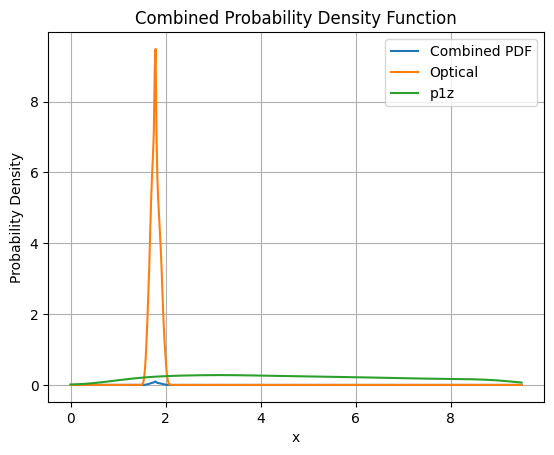

In [548]:
import numpy as np
from scipy.interpolate import interp1d

# Generate example data for two PDFs
# p1_z = np.exp(self.lnp[ind,:])


p1_z = 100*(p1_z/np.sum(p1_z))
p2_z = 100*(np.exp(self.lnp[ind,:])/np.sum(np.exp(self.lnp[ind,:])))
# p2_z = np.exp(self.lnp[ind,:])

# # Create a common grid for interpolation
common_grid = np.linspace(min(p2_z), max(p2_z), len(p2_z))

# # Interpolate the first PDF onto the common grid
# interp_p1 = interp1d(np.linspace(min(p1_z), max(p1_z), len(p1_z)), p1_z, kind='linear', fill_value=0.0, bounds_error=False)
# interp_p1_z = interp_p1(common_grid)

# # Combine the PDFs by element-wise multiplication
combined_pdf = p1_z * p2_z

# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Print the first few values of the combined PDF

# z_galaxy683_cosmos = 2.322


plt.plot(common_grid, combined_pdf, label='Combined PDF')
plt.plot(common_grid, p2_z, label='Optical')
plt.plot(common_grid, p1_z, label='p1z')
# plt.plot(common_grid, combined_pdf, label='Combined PDF')


# plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


In [407]:
best_z_val=common_grid[np.where(np.array(combined_pdf)==max(combined_pdf))[0][0]]

best_z_val

2.3014748769647935

2.3014748769647935

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate example data for two PDFs
p1_z = np.random.rand(100)
p2_z = np.random.rand(1000)

# Create a common grid for interpolation
common_grid = np.linspace(min(p2_z), max(p2_z), len(p2_z))

# Interpolate the first PDF onto the common grid
interp_p1 = interp1d(np.linspace(min(p1_z), max(p1_z), len(p1_z)), p1_z, kind='linear', fill_value=0.0, bounds_error=False)
interp_p1_z = interp_p1(common_grid)

# Combine the PDFs by element-wise multiplication
combined_pdf = interp_p1_z * p2_z

# Normalize the combined PDF
combined_pdf /= np.sum(combined_pdf)

# Create the x-axis values using the common grid
x_values = common_grid

# Plot the combined PDF
plt.plot(x_values, combined_pdf, label='Combined PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Combined Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()


(array([494.,   2.,   3.,   1.,   2.,   2.,   1.,   0.,   3.,   3.]),
 array([0.        , 0.01026578, 0.02053156, 0.03079735, 0.04106313,
        0.05132891, 0.06159469, 0.07186047, 0.08212626, 0.09239204,
        0.10265782]),
 <BarContainer object of 10 artists>)

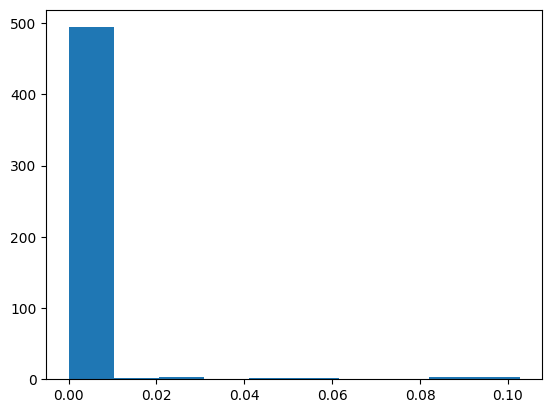

In [264]:
plt.hist(combined_pdf)

In [87]:
# np.array(zout['z_spec'])[ind]
np.array(zout['z_phot'])[ind]

NameError: name 'zout' is not defined

In [46]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits

Get best fit coeffs & best redshifts
fit_best: 1.2 s (n_proc=1,  NOBJ=3118)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


 27%|███████████████▊                                           | 836/3118 [00:03<00:09, 243.89it/s]


 NNLS quitting on iteration count.


100%|██████████████████████████████████████████████████████████| 3118/3118 [00:13<00:00, 233.01it/s]


In [170]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits

Get best fit coeffs & best redshifts
fit_best: 0.0 s (n_proc=1,  NOBJ=0)
pz_percentiles: No objects in selection
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


0it [00:00, ?it/s]


ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

Text(0, 0.5, '$(U-V)_0$')

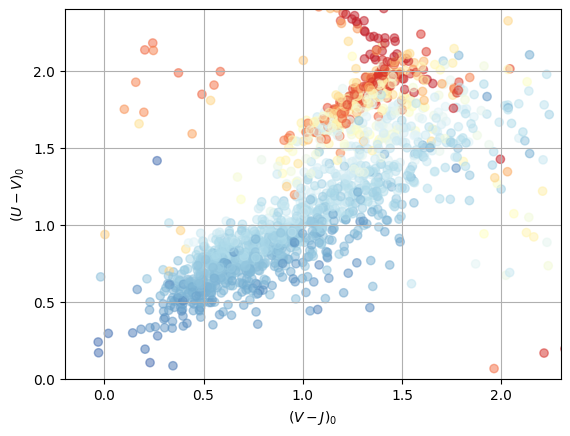

In [47]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')    

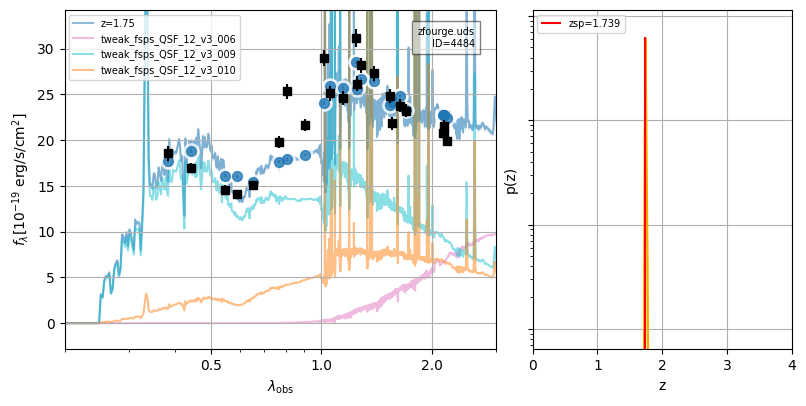

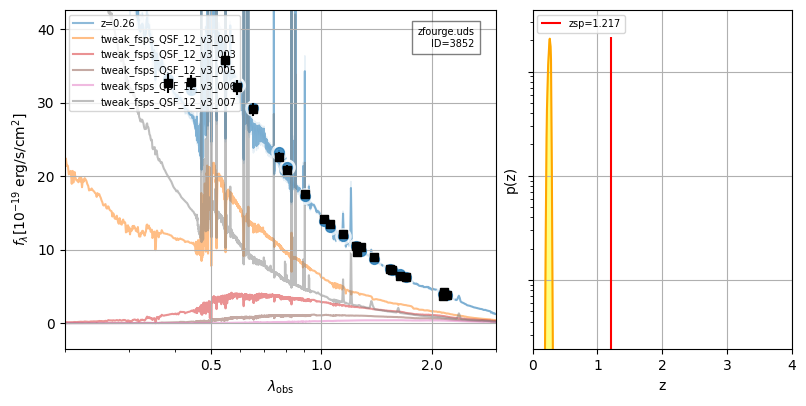

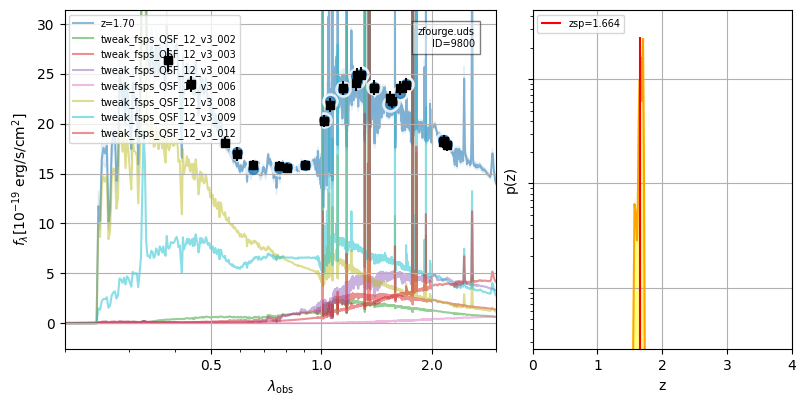

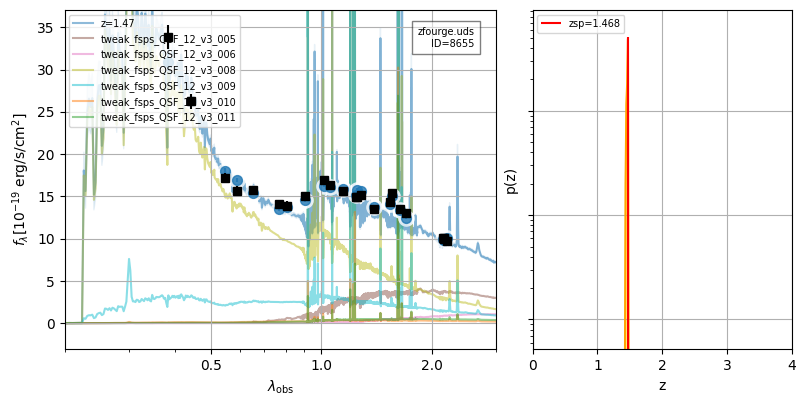

In [48]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = params['PRIOR_ABZP'] - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

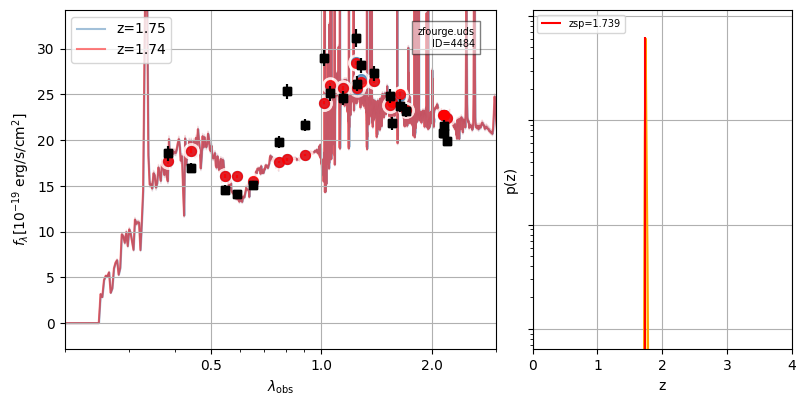

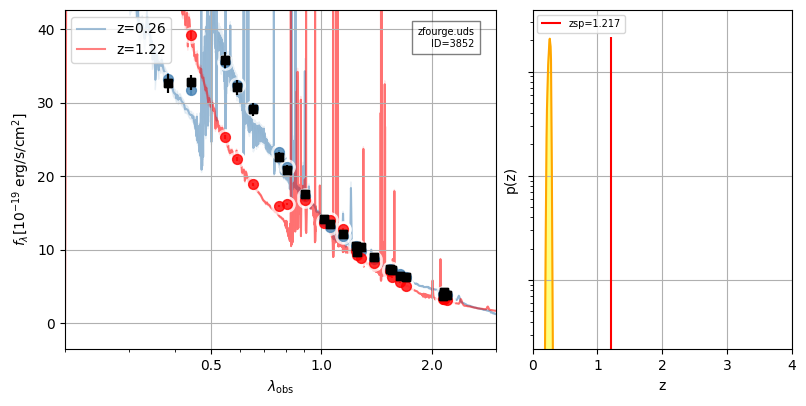

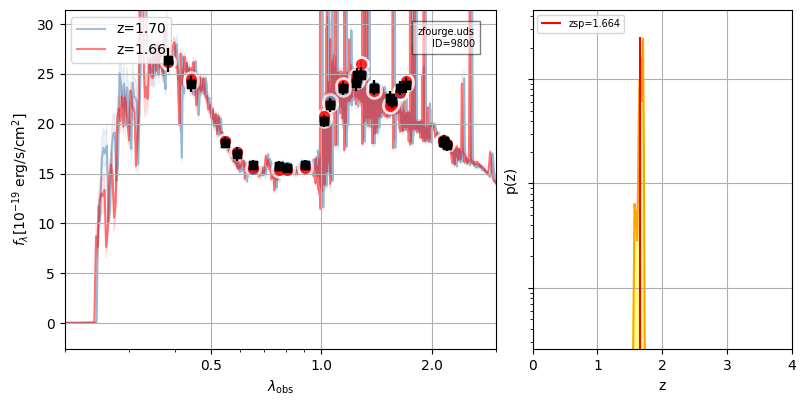

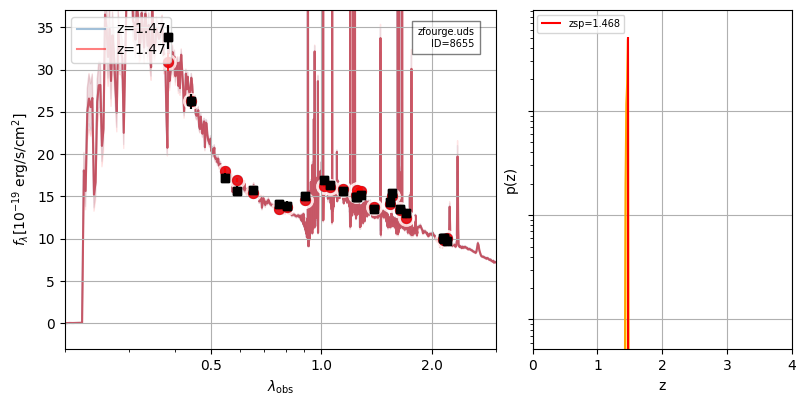

In [50]:
# Compare forced fit at z_spec
for i in range(4):
    ix = np.where(self.OBJID == ids[i])[0][0]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], 
                        show_components=False,
                        template_color='steelblue', logpz=True, zr=[0,4])

    # Now show with z_spec
    axes = fig.axes[:1]
    res = self.show_fit(ids[i], xlim=[0.2, 3], axes=axes,
                        zshow=self.ZSPEC[ix], 
                        show_components=False,
                        template_color='r')

    axes[0].legend(loc='upper left')

## `zout` properties

In [92]:
zout.meta

NameError: name 'zout' is not defined

In [91]:
zout.info()

NameError: name 'zout' is not defined

# Save / restore state with HDF5

In [20]:
try:
    import h5py
except:
    ! pip install h5py
    
import eazy.hdf5
eazy.hdf5.write_hdf5(self, h5file=self.param['MAIN_OUTPUT_FILE'] + '.h5')

h5: create file zfourge.uds.h5
h5: cat/flux_columns
h5: cat/err_columns
h5: cat/f_numbers
h5: cat/fnu
h5: cat/efnu_orig
h5: cat/ok_data
h5: cat/zp
h5: cat/ext_corr
h5: cat/ext_redden
h5: cat/pivot
h5: fit/zml
h5: fit/zbest
h5: fit/chi2_fit
h5: fit/coeffs_best
h5: fit/fit_coeffs
h5: templates/tweak_fsps_QSF_12_v3_001.dat
h5: templates/tweak_fsps_QSF_12_v3_002.dat
h5: templates/tweak_fsps_QSF_12_v3_003.dat
h5: templates/tweak_fsps_QSF_12_v3_004.dat
h5: templates/tweak_fsps_QSF_12_v3_005.dat
h5: templates/tweak_fsps_QSF_12_v3_006.dat
h5: templates/tweak_fsps_QSF_12_v3_007.dat
h5: templates/tweak_fsps_QSF_12_v3_008.dat
h5: templates/tweak_fsps_QSF_12_v3_009.dat
h5: templates/tweak_fsps_QSF_12_v3_010.dat
h5: templates/tweak_fsps_QSF_12_v3_011.dat
h5: templates/tweak_fsps_QSF_12_v3_012.dat


## Initialize from HDF5

In [21]:
new = eazy.hdf5.initialize_from_hdf5(h5file=self.param['MAIN_OUTPUT_FILE'] + '.h5')

Read default param file: /Users/ptanouri/Library/Python/3.9/lib/python/site-packages/eazy/data/zphot.param.default
CATALOG_FILE is a table
   >>> NOBJ = 3207
F8_0 e_F8_0 ( 21): IRAC/irac_tr4_2004-08-09.dat
F5_8 e_F5_8 ( 20): IRAC/irac_tr3_2004-08-09.dat
F4_5 e_F4_5 ( 19): IRAC/irac_tr2_2004-08-09.dat
F3_6 e_F3_6 ( 18): IRAC/irac_tr1_2004-08-09.dat
FKs e_FKs (255): FOURSTAR/Ks_cam_optics_sky.txt
FKsHI e_FKsHI (269): VLT/hawki_k_ETC.dat
FJ1 e_FJ1 (249): FOURSTAR/J1_cam_optics_sky.txt
FJ2 e_FJ2 (250): FOURSTAR/J2_cam_optics_sky.txt
FJ3 e_FJ3 (251): FOURSTAR/J3_cam_optics_sky.txt
FHs e_FHs (254): FOURSTAR/Hshort_cam_optics_sky.txt
FHl e_FHl (253): FOURSTAR/Hlong_cam_optics_sky.txt
Fu e_Fu ( 88): megaprime/cfht_mega_u_cfh9301.dat
FB e_FB (122): UKIDSS/B_qe.txt
FV e_FV ( 79): COSMOS/SUBARU_filter_V.txt
FR e_FR (123): UKIDSS/R_qe.txt
Fi e_Fi (124): UKIDSS/i_qe.txt
Fz e_Fz (125): UKIDSS/z_qe.txt
FY e_FY (266): VLT/hawki_y_ETC.dat
FJ e_FJ (263): UKIDSS/Table04_online.dat
FH e_FH (264): UKIDSS/T

511it [00:00, 1975.01it/s]


h5: read tweak_fsps_QSF_12_v3_001.dat
h5: read tweak_fsps_QSF_12_v3_002.dat
h5: read tweak_fsps_QSF_12_v3_003.dat
h5: read tweak_fsps_QSF_12_v3_004.dat
h5: read tweak_fsps_QSF_12_v3_005.dat
h5: read tweak_fsps_QSF_12_v3_006.dat
h5: read tweak_fsps_QSF_12_v3_007.dat
h5: read tweak_fsps_QSF_12_v3_008.dat
h5: read tweak_fsps_QSF_12_v3_009.dat
h5: read tweak_fsps_QSF_12_v3_010.dat
h5: read tweak_fsps_QSF_12_v3_011.dat
h5: read tweak_fsps_QSF_12_v3_012.dat
fit_best: 0.2 s (n_proc=1,  NOBJ=3117)


In [22]:
# Verify things are the same
assert(np.allclose(self.fnu, new.fnu))
assert(np.allclose(self.ok_data, new.ok_data))
try:
    assert(np.allclose(self.efnu_orig, new.efnu_orig))
except AssertionError:
    # Missing data might be represented a bit differently
    assert(np.allclose(self.efnu_orig[self.ok_data], new.efnu_orig[self.ok_data]))

assert(np.allclose(self.efnu[self.ok_data], new.efnu[self.ok_data]))
assert(np.allclose(self.prior_mags, new.prior_mags))
assert(np.allclose(self.zml, new.zml))
assert(np.allclose(self.zbest, new.zbest))
try:
    assert(np.allclose(self.lnp, new.lnp, rtol=1.e-3))
except AssertionError:
    self.compute_lnp(prior=self.ZML_WITH_PRIOR,
                     beta_prior=self.ZML_WITH_BETA_PRIOR) 
    
    assert(np.allclose(self.lnp, new.lnp, rtol=1.e-3))

    

print('Made it to the end, everything is the same!')

Made it to the end, everything is the same!


## Tool for visualizing SEDs straight from HDF5

The `eazy.hdf5.Viewer` object provides a tool for plotting object SEDs without having to initialize a full `eazy.photoz.PhotoZ` object.  This may be useful for very large catalogs, as HDF5 handles the array access for large, 
memory-intensive arrays without having to load lots of things into memory.

OrigObj chi2 = 5.60651
NewObj  chi2 = 5.60651
Viewer  chi2 = 5.60651


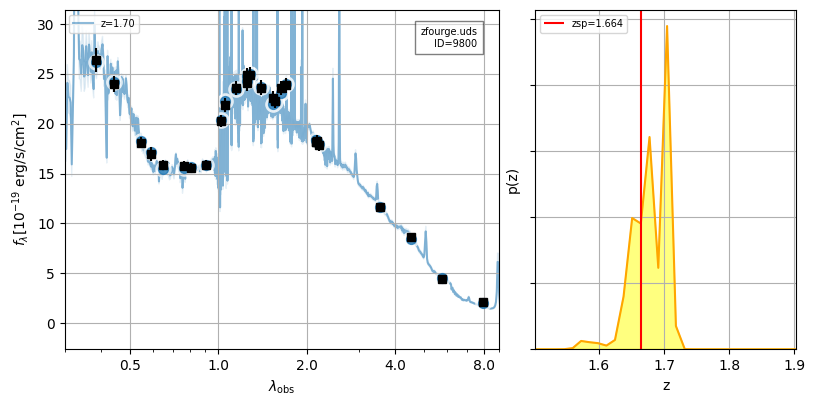

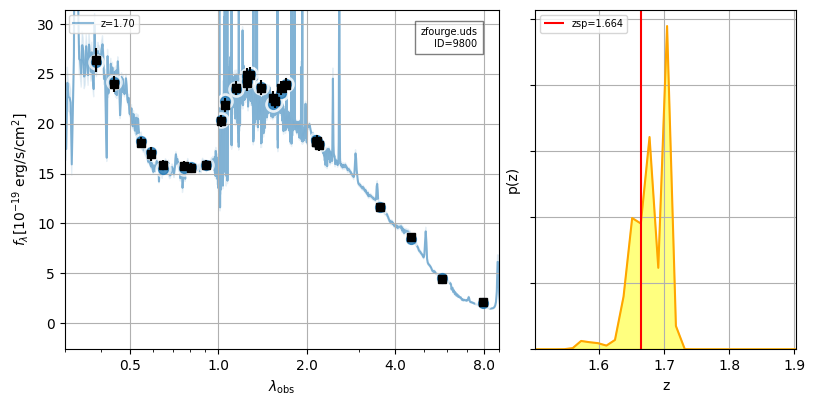

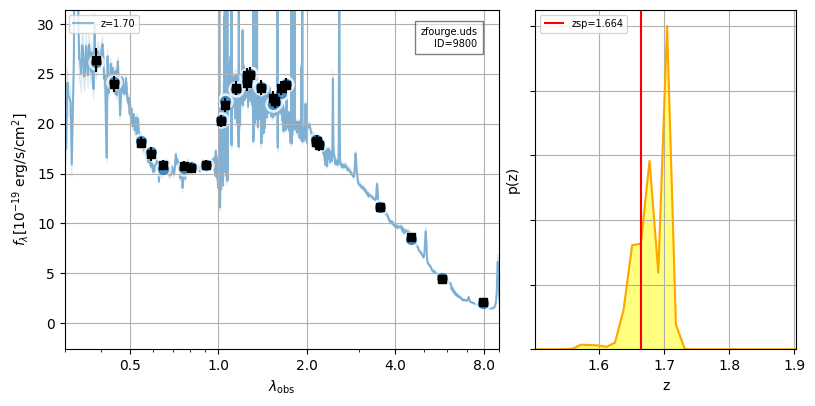

In [23]:
view = eazy.hdf5.Viewer(self.param['MAIN_OUTPUT_FILE'] + '.h5', verbose=False)

# Original object
s0 = self.show_fit(ids[2])

# The new PhotoZ object
s1 = new.show_fit(ids[2])

# The Viewer object
sv = view.show_fit(ids[2])

zph = s0[1]['z']

for _, label in zip([s0, s1, sv], ['OrigObj', 'NewObj', 'Viewer']):
    _[0].axes[1].set_xlim(zph-0.2, zph+0.2)
    print(f"{label:7} chi2 = {_[1]['chi2']:.5f}")

In [24]:
try:
    import plotly

    ## plotly viewer
    kws = dict(vertical=False, show=True)

    # Original object
    f0 = self.show_fit_plotly(ids[2], **kws)

    # The new PhotoZ object
    f1 = new.show_fit_plotly(ids[2], **kws)

    # The Viewer object
    fv = view.show_fit_plotly(ids[2], **kws)
except:
    print('`plotly` not installed')
    

# Visualization tool

Interactive tool added February 2022 for exploring the catalog and photo-z outputs with [Plotly/Dash](https://plotly.com/dash/).


In [25]:
try:
    import jupyter_dash
except ImportError:
    ! pip install dash==2.0
    ! pip install jupyter-dash

zsh:1: command not found: pip
zsh:1: command not found: pip


In [26]:
import eazy.visualization
from importlib import reload
reload(eazy.visualization)

zout['jh'] = (-2.5*np.log10(self.cat['FJ1']/self.cat['FHs'])) #.filled(-1.)
zout['hk'] = (-2.5*np.log10(self.cat['FHs']/self.cat['FKs'])) #.filled(-1.)

bband = self.flux_columns[np.nanargmin((self.lc - 4500)**2)]
zband = self.flux_columns[np.nanargmin((self.lc - 9000)**2)]
zout['Bz'] = (-2.5*np.log10(self.cat[bband]/self.cat[zband])) #.filled(-1.)
zout['zK'] = (-2.5*np.log10(self.cat[zband]/self.cat['FKs'])) #.filled(-1.)

extra_plots = {
               'JH-redshift': ('z_phot','jh','z<sub>phot</sub>', '(J1-Hs)<sub>obs</sub>', (0, 4), (-0.1, 1.9)),
               'HK-redshift': ('z_phot','hk','z<sub>phot</sub>', '(Hs-Ks)<sub>obs</sub>', (0, 4), (-0.1, 1.9)),
               'BzK': ('Bz','zK',f'{bband} - {zband}', f'{zband} - K<sub>s</sub>', (-0.5, 5), (-0.5, 5)),
              }

for c in ['jh','hk', 'zK','Bz']:
    if hasattr(zout[c], 'mask'):
        zout[c].fill_value = -1.
    
sel = (zf['Use'] > -1)

vis = eazy.visualization.EazyExplorer(self, zout, extra_plots=extra_plots, 
                                      selection=sel)

if 1:
    app = vis.make_dash_app(server_mode='inline', plot_height=450,
                        infer_proxy=os.getcwd().startswith('/content'))


Failed to import dash & plotly, so the interactive toolwon	 work.
Install with `pip install dash>=2.5.1` and also `pip install jupyter_dash` for running a server through jupyter


ImportError: cannot import name 'get_current_traceback' from 'werkzeug.debug.tbtools' (/Users/ptanouri/Library/Python/3.9/lib/python/site-packages/werkzeug/debug/tbtools.py)

## static view

![static_viewer](dash_viewer.png)


In [39]:
# Run host locally
if 0:
    app = vis.make_dash_app(server_mode='external', plot_height=500, 
                        infer_proxy=os.getcwd().startswith('/content'))

NameError: name 'app' is not defined